In [1]:
from tensorflow.keras.models import load_model
new_model = load_model('models/trained_model.hdf5')

In [2]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [3]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
predictions=['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
def predict_new(path):
    img = cv2.imread(path)
    RGBImg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    RGBImg= cv2.resize(RGBImg,(180,180))
    plt.imshow(RGBImg)
    image = np.array(RGBImg) / 255.0
    predict=new_model.predict(np.array([image]))
    print(predict)
    pred=np.argmax(predict,axis=1)
    print(f"Predicted: {predictions[pred[0]]}")

2023-03-12 16:18:07.653951: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 236ms/step
[[8.5116932e-03 1.5837901e-04 9.0159929e-01 8.9730583e-02]]
Predicted: NonDemented


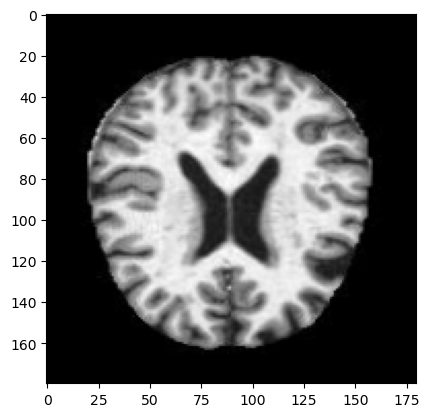

In [4]:
predict_new("/Users/nischithtn/gfg_backend/Alzheimer_s Dataset/test/NonDemented/26 (63).jpg")